<a href="https://colab.research.google.com/github/Belal-AI/Rev-Projects/blob/main/Country_unlabled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Loading the Data 

In [232]:
data=pd.read_csv("Country-data.csv")
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# country feature is not effected and if we use it it will increas the variance and help the model to ovdefit and thats what we want skip

In [233]:
name_of_contires=data["country"]

In [162]:
data.drop("country",inplace=True,axis=1)

In [163]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


#cheack if the data has nulls

In [165]:
data.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [167]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# as we can see the data is normal but its skweed positively

<Axes: xlabel='life_expec', ylabel='Density'>

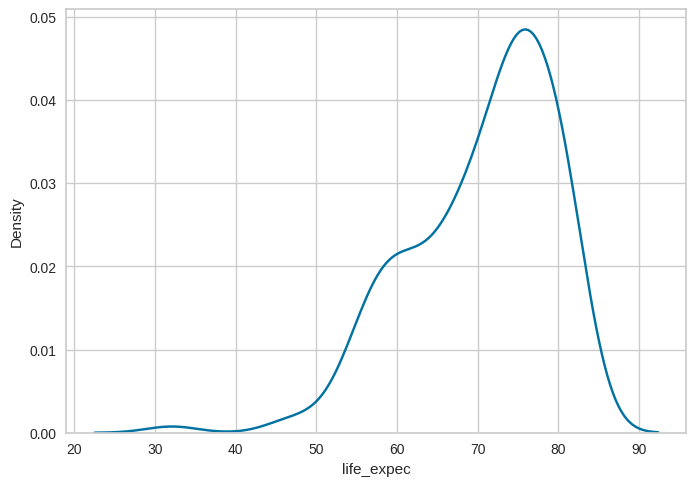

In [168]:
sns.kdeplot(data=data['life_expec'])

- we dont need the PCA cause for sure the training on the orignal data is better but i tried show my skills in PCA and also to check the variblity of the PCs

In [171]:
from sklearn.decomposition import PCA

In [172]:
pca=PCA()

In [173]:
pca.fit_transform(data)

array([[-1.98151280e+04, -1.65112472e+03,  3.84249303e+01, ...,
         3.30993646e+00, -1.55322691e-01, -1.22278104e+00],
       [-1.13389390e+04,  1.49346903e+03, -2.81821634e+01, ...,
        -3.26500927e+00, -7.96140267e-01,  6.50386696e-01],
       [-8.92635259e+03,  3.26468410e+03, -1.19161129e+01, ...,
        -4.06703599e+00, -1.03468898e+00, -1.26226769e-01],
       ...,
       [-1.72020172e+04, -2.22889872e+02, -4.52501670e+01, ...,
        -1.67344369e+00,  7.50542046e-01,  5.94938803e-01],
       [-1.72093402e+04, -2.29815901e+02,  7.95878591e+00, ...,
        -6.98960764e-01, -6.66683274e-01, -9.05835946e-01],
       [-1.79784216e+04, -1.16312463e+03,  3.22022792e+01, ...,
         1.02262001e+01,  9.23630448e-01, -9.27093009e-01]])

In [174]:
pca.singular_values_

array([3.33680606e+05, 7.82082626e+04, 4.55699970e+02, 4.03613471e+02,
       1.49781876e+02, 1.10453522e+02, 4.62437253e+01, 2.65233150e+01,
       1.00793541e+01])

In [175]:
pca.explained_variance_ratio_

array([9.47923065e-01, 5.20734600e-02, 1.76794667e-06, 1.38689143e-06,
       1.90998382e-07, 1.03865256e-07, 1.82060941e-08, 5.98917170e-09,
       8.64921244e-10])

- you can detrmine the number of PCs(priciples components) by elbow method by getting the releatin between the varinaces and the number of PCs

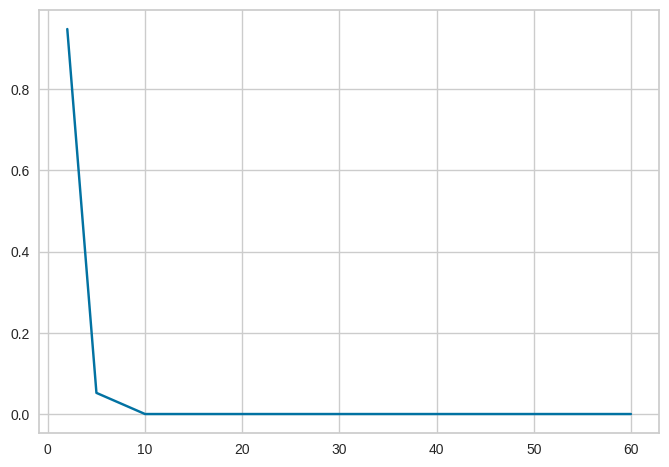

In [176]:
lista=[2,5,10,20,30,40,45,50,60]
plt.plot(lista,pca.explained_variance_ratio_)

In [177]:
pca=PCA(n_components=5)

In [178]:
data_reduced=pca.fit_transform(data)

- because our data is unlabeld which is mean our training is un-supervised by kmeans (clustering)
- but how we will detrmine the K of cluster??
 

In [179]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

- you can firstly use the model very roughly without any thresholds or certain selection of hyperparameters
- and then calculate the inertia for each splitting clusters from 2 to above

# - hint :nertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

- all of it implimented by KElbowVisualizer in yellowbrick.cluster

In [180]:
model=KMeans()

In [181]:
model.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [182]:
model.inertia_

4260514816.115401

In [183]:
model.score(data)

-4260514816.1154003

In [184]:
from yellowbrick.cluster import KElbowVisualizer


In [185]:
elbow=KElbowVisualizer(model)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

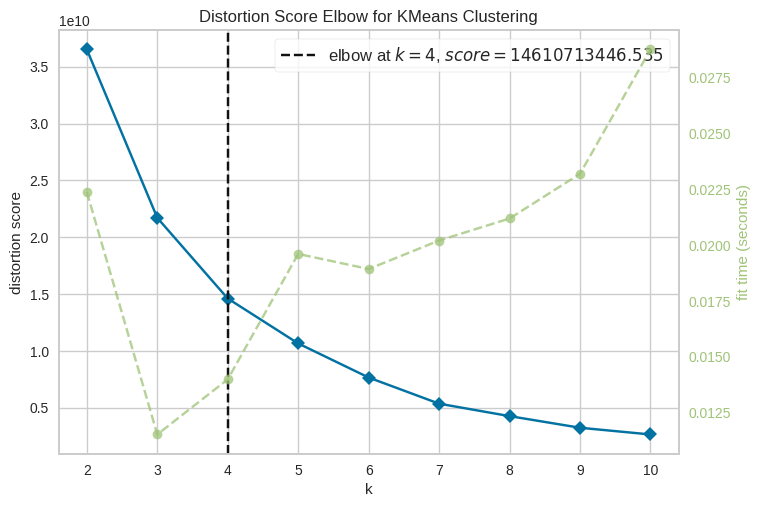

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [186]:
elbow.fit(data)
elbow.show()

- as we can see here again the best Ks we can select is 4 with respect to elbow method 
- if you tried to ask your self what is the factor thad detrmined on the number of Ks
- again elbow method calculate the inertia for each splitting choice and when the number of Ks increase without big change on inertial we  select this poitn
- but not always the elbow method is right or we dont take its alone as evaluation step for our model ....cause it just care about the data-points and its releation with its centroids(inner releation)...may the releation between classes it self is weak

In [187]:
model=KMeans(n_clusters=4)

In [188]:
scaler=StandardScaler()
datascalled=scaler.fit_transform(data)

In [189]:
model.fit(datascalled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [190]:
model.score(datascalled)

-700.3917199643633

In [191]:
model.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 3, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [192]:
from sklearn.metrics import silhouette_samples, silhouette_score

- so we come for  Silhouett :The Silhouette Coefficient is used when the ground-truth about the dataset is unknown and computes the density of clusters computed by the model. The score is computed by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering

In [193]:
from yellowbrick.cluster import SilhouetteVisualizer

In [194]:
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

- if we locked at the resulut of the chossing 4 cntroides its unblanced  and there a class 4 has low values

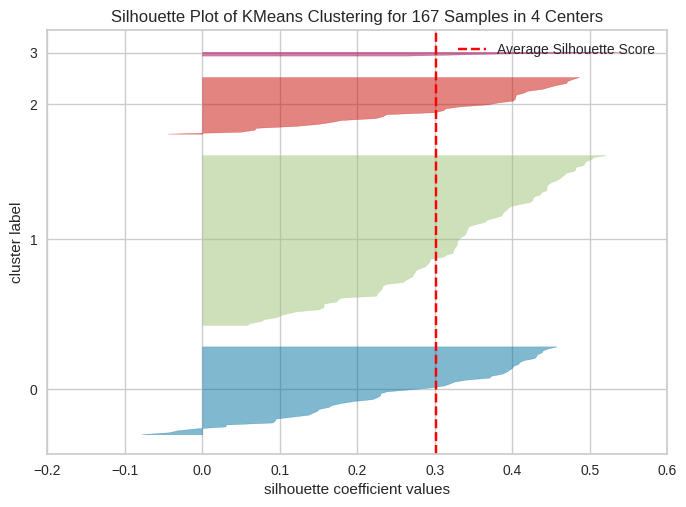

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 167 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [197]:
visualizer.fit(datascalled)
visualizer.show()

In [198]:
model2=KMeans(n_clusters=3,random_state=42)

In [199]:
viscluster=SilhouetteVisualizer(model2,colors='yellowbrick')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

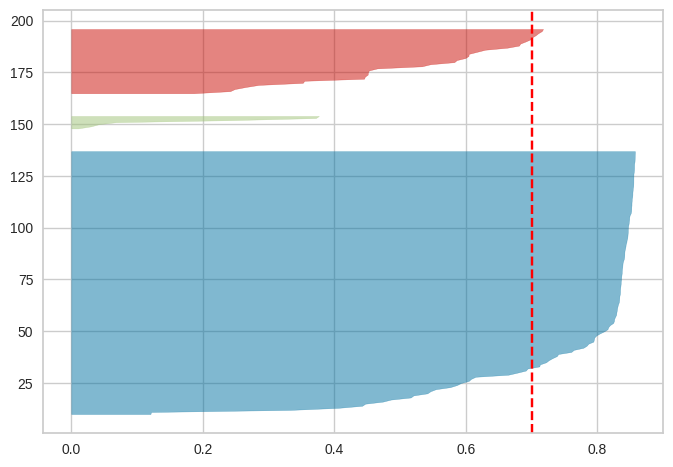

In [200]:
viscluster.fit(data)

In [153]:
silhouette_score(datascalled,model2.labels_)

0.28329575683463126

In [201]:
model.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 3, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

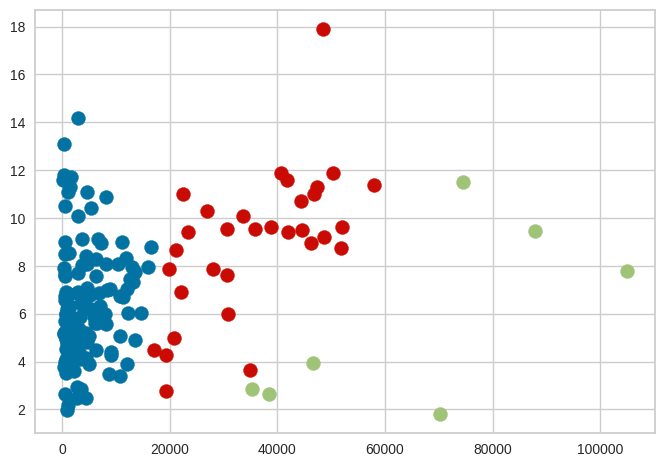

In [203]:
plt.scatter(data['gdpp'][model2.labels_==0],data['health'][model2.labels_==0],s = 100)
plt.scatter(data['gdpp'][model2.labels_==1],data['health'][model2.labels_==1],s = 100)
plt.scatter(data['gdpp'][model2.labels_==2],data['health'][model2.labels_==2],s = 100)

# countries with class 2

In [210]:
name_of_contires[model2.labels_==1]

23          Brunei
82          Kuwait
91      Luxembourg
114         Norway
123          Qatar
133      Singapore
145    Switzerland
Name: country, dtype: object

# countries with class 1

In [246]:
name_of_contires[model2.labels_==0]

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 128, dtype: object

# countries with class 3

In [235]:
name_of_contires[model2.labels_==2]

7                 Australia
8                   Austria
10                  Bahamas
11                  Bahrain
15                  Belgium
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
49        Equatorial Guinea
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
98                    Malta
110             Netherlands
111             New Zealand
115                    Oman
122                Portugal
128            Saudi Arabia
135                Slovenia
138             South Korea
139                   Spain
144                  Sweden
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object

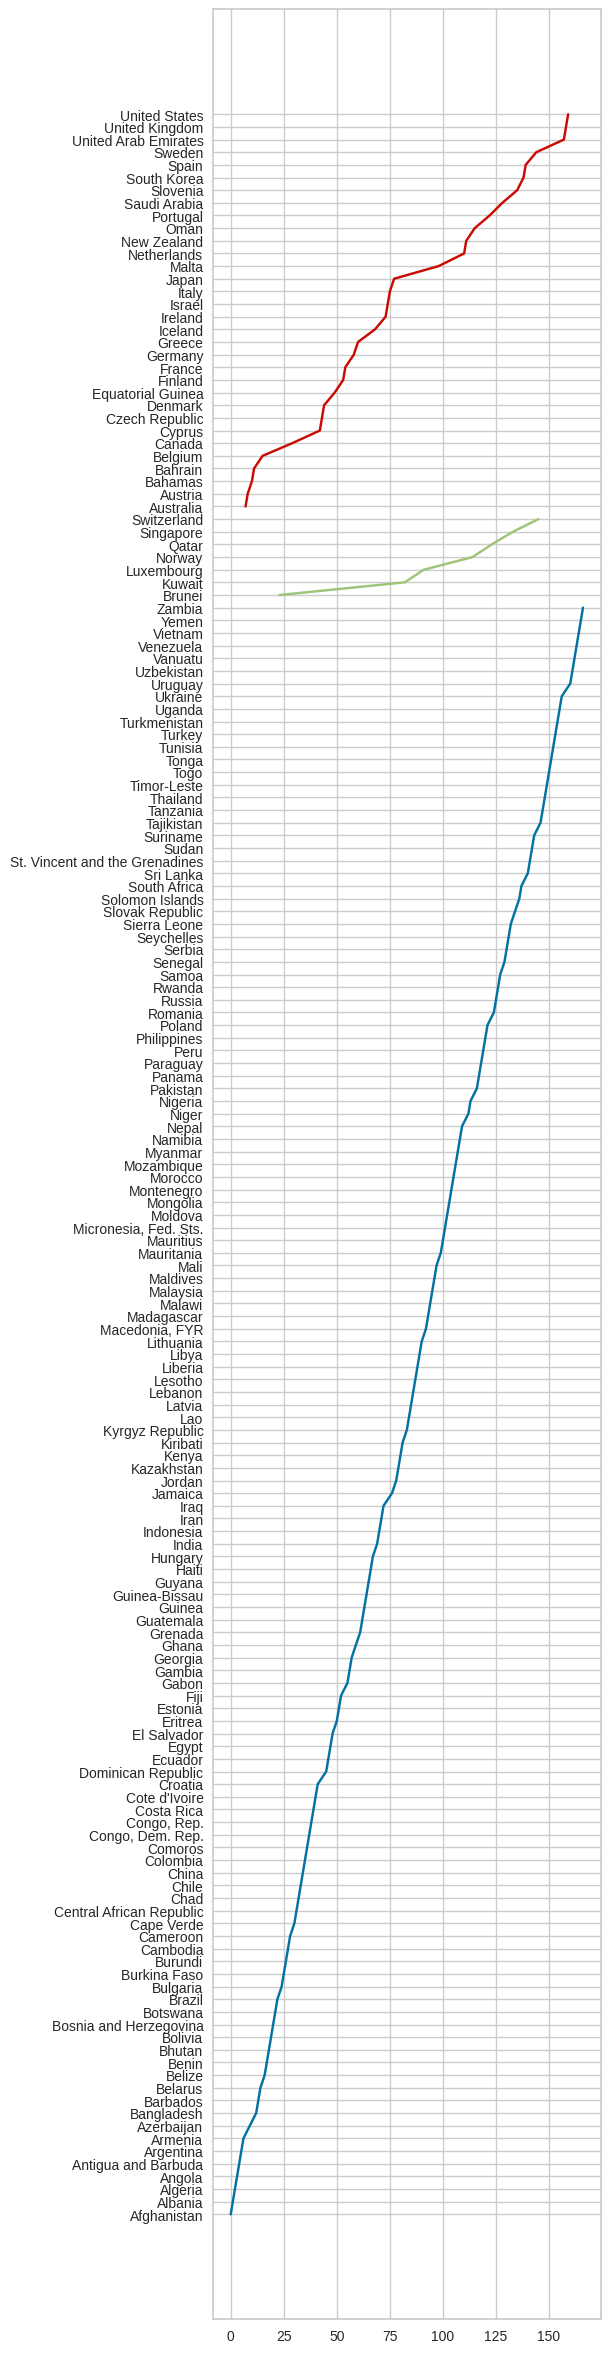

In [260]:
plt.figure(figsize=(5,30))
plt.plot(name_of_contires[model2.labels_==0])
plt.plot(name_of_contires[model2.labels_==1])
plt.plot(name_of_contires[model2.labels_==2])